In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics

#SVM and Random Forest



In [48]:
df = pd.read_csv("../NKI_cleaned.csv")

In [49]:
df.head(10)

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,s122,18,43,0,14.817248,14.817248,0,0,1,1,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,s123,19,48,0,14.261465,14.261465,0,0,0,1,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,s124,20,38,0,6.644764,6.644764,0,0,0,1,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,s125,21,50,0,7.748118,7.748118,0,1,0,1,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,s126,22,38,0,6.436687,6.318960,0,0,1,1,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160
5,s127,23,42,0,5.037645,2.743326,1,0,1,1,...,-0.417534,-0.141338,-0.492190,0.090633,-0.169754,-0.220211,-0.429283,-0.042797,-0.394709,-0.390144
6,s128,24,50,0,8.739220,8.739220,1,1,0,1,...,0.086751,-0.144424,-0.778273,0.024693,0.204909,-0.043497,-0.172939,-0.013997,-0.437534,0.255511
7,s129,25,43,0,7.567420,7.567420,1,0,0,1,...,-0.003150,0.043824,0.442394,-0.498541,-0.231900,0.029205,-0.078742,-0.241568,-0.841080,-0.680880
8,s130,26,47,0,7.296372,7.296372,1,0,0,1,...,-0.362921,-0.038672,-0.647650,-0.760694,0.146781,0.038366,-0.127822,-0.058059,-1.041802,-0.130038
9,s131,27,39,1,4.662560,1.114305,0,0,0,1,...,-0.845758,0.635155,-0.235659,-0.396895,-0.474251,-0.298208,-0.531806,0.091948,-0.605779,-0.607580


In [7]:
X = df["timerecurrence"].to_numpy()

In [8]:
y = df["survival"].to_numpy()

In [9]:
X.shape

(272,)

In [10]:
y.shape

(272,)

In [11]:
idx = np.arange(len(X)) 

In [12]:
np.random.shuffle(idx)

In [13]:
idx

array([104,  50, 134, 149,   6, 190, 230,  98,  20,  80, 250, 215, 168,
       170, 126, 111,  43, 150,  21,  71, 102,  35, 147,   4, 107, 124,
        70,   3,  14, 125, 265, 179,  90, 238,  68, 169,  91, 118, 213,
       237,  75, 187,   9, 271, 184,  23, 225, 268, 136,  32, 103, 241,
       231, 155, 174,  54, 135,  64,  17, 254,  27, 222, 227, 221, 220,
       130, 164, 133,  56,  10,  51, 216, 243, 207,   5,  97,  59, 239,
        41, 224,  46, 131, 181, 129, 217, 189,  57, 140, 158, 233, 252,
        30, 172,  13, 255,  79,  85, 188,  86, 166, 251, 119,  72, 142,
       145, 197, 153, 205,  82, 182,   2,  73, 261, 245,  83,  62,  38,
       152,  42, 202, 161, 143,  94, 167, 232,  74, 157,  67, 269, 258,
       218,  48, 226,  25, 229,  28, 122, 191,  58,  84, 247,  34, 194,
       180, 177, 110,  52, 236, 246,  66, 163, 141, 212, 264, 171, 173,
       146,  53, 123,  60, 235,  12,  39, 148,  78,  45, 138, 175, 127,
       263,  24, 201, 259,  87,  16,  26,   1, 109,  49, 219,  8

In [14]:
split_threshold = int(len(X) * 0.8)

In [15]:
split_threshold

217

In [16]:
train_idx = idx[:split_threshold]

In [17]:
test_idx = idx[split_threshold:]

In [18]:
x_train = X[train_idx]

In [19]:
y_train = y[train_idx]

In [20]:
x_test = X[test_idx]

In [21]:
y_test = y[test_idx]

In [25]:
my_data = pd.read_csv("../NKI_cleaned.csv")

In [26]:
my_data.head()

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,s122,18,43,0,14.817248,14.817248,0,0,1,1,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,s123,19,48,0,14.261465,14.261465,0,0,0,1,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,s124,20,38,0,6.644764,6.644764,0,0,0,1,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,s125,21,50,0,7.748118,7.748118,0,1,0,1,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,s126,22,38,0,6.436687,6.318960,0,0,1,1,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160


In [27]:
my_data["survival"].min()

0.711841

In [28]:
my_data["survival"].max()

18.340862

In [29]:
my_data["survival"].mean()

8.080608937500001

(array([18., 23., 47., 56., 37., 38., 21., 11., 11., 10.]),
 array([ 0.711841 ,  2.4747431,  4.2376452,  6.0005473,  7.7634494,
         9.5263515, 11.2892536, 13.0521557, 14.8150578, 16.5779599,
        18.340862 ]),
 <a list of 10 Patch objects>)

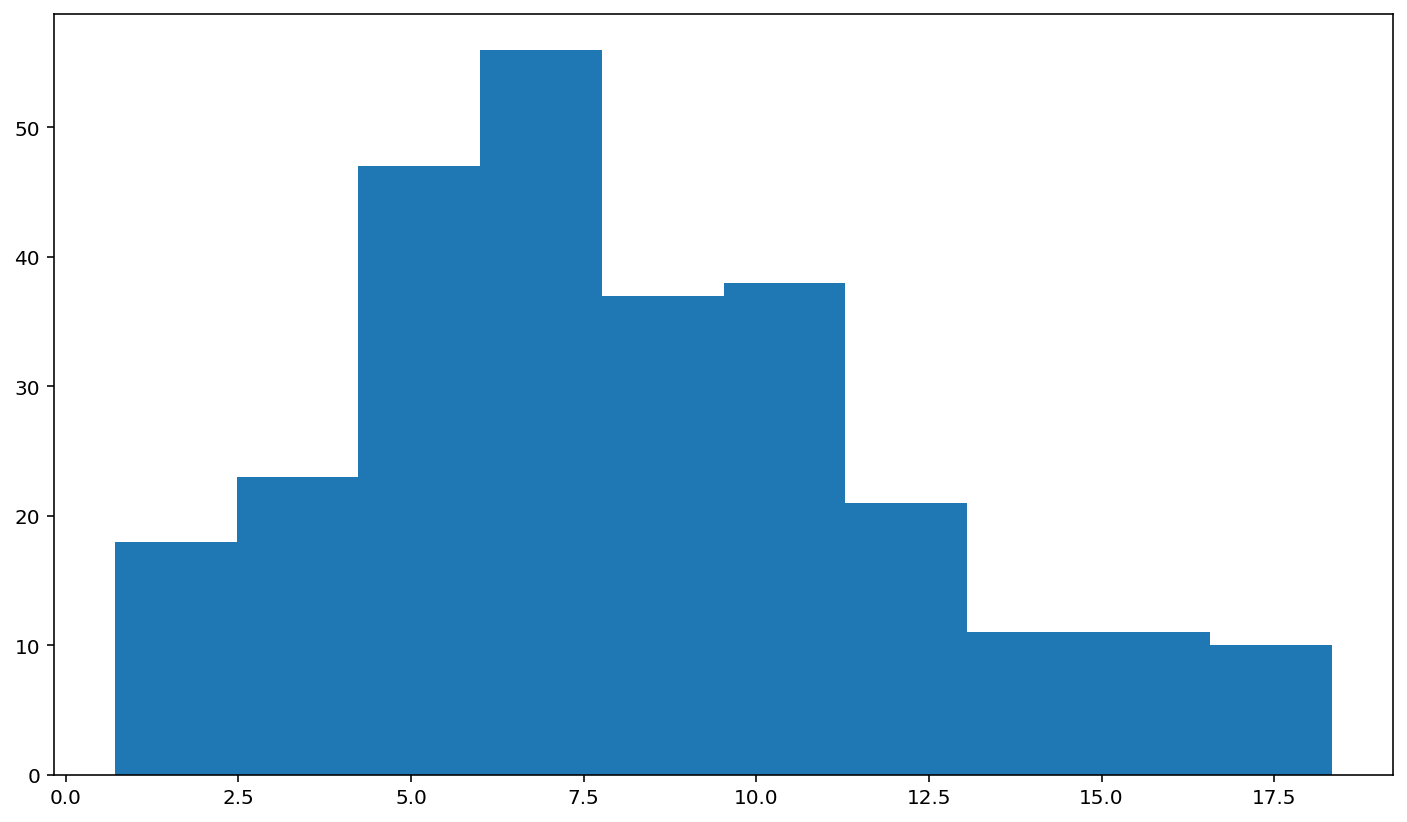

In [30]:
plt.hist(my_data["survival"])

In [31]:
def divide_survival(x):
    if float(x) <= 10:
        return "low"
    else:
        return "high"

In [32]:
my_data["survival"].apply(divide_survival)

0      high
1      high
2       low
3       low
4       low
       ... 
267     low
268     low
269     low
270     low
271     low
Name: survival, Length: 272, dtype: object

In [33]:
my_data["survival_type"] = my_data["survival"].apply(divide_survival)

In [34]:
my_data

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,...,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420,survival_type
0,s122,18,43,0,14.817248,14.817248,0,0,1,1,...,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795,high
1,s123,19,48,0,14.261465,14.261465,0,0,0,1,...,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098,high
2,s124,20,38,0,6.644764,6.644764,0,0,0,1,...,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911,low
3,s125,21,50,0,7.748118,7.748118,0,1,0,1,...,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710,low
4,s126,22,38,0,6.436687,6.318960,0,0,1,1,...,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,s71,308,48,1,2.608300,1.982204,1,0,1,1,...,-0.076025,0.201054,-0.108361,0.222534,-0.471391,0.026301,0.476758,-0.468408,-0.843889,low
268,s72,309,39,1,5.504100,3.028063,0,0,1,1,...,0.108220,0.083472,-0.859677,-0.551512,-0.191424,-0.844488,-0.357929,-0.585760,0.169989,low
269,s73,310,50,1,2.619200,2.149213,0,0,1,1,...,0.251779,-0.063160,0.450576,0.452686,1.055764,0.591880,-0.510884,0.251903,-0.822792,low
270,s75,311,52,1,2.290500,2.209446,0,1,1,1,...,-0.417394,-0.077948,-0.126006,-0.841332,-0.274742,-0.063019,-0.396531,0.356816,0.345088,low


In [35]:
from sklearn import svm

In [36]:
X = my_data[["age", "timerecurrence"]].to_numpy()

In [37]:
y = my_data["survival_type"]

In [38]:
idx = np.arange(len(X))
np.random.shuffle(idx)

split_threshold = int(len(X) * 0.8)

In [39]:
x_train = X[:split_threshold]
x_test = X[split_threshold:]

y_train = y[:split_threshold]
y_test = y[split_threshold:]

In [40]:
clf = svm.SVC()

In [41]:
clf.fit(x_train, y_train)

SVC()

In [42]:
y_hat = clf.predict(x_test)
y_hat

array(['low', 'high', 'high', 'high', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low'], dtype=object)

In [43]:
y_test

217     low
218    high
219    high
220    high
221    high
222    high
223     low
224     low
225     low
226     low
227     low
228     low
229     low
230     low
231     low
232    high
233    high
234     low
235     low
236    high
237     low
238     low
239     low
240     low
241     low
242     low
243     low
244     low
245     low
246    high
247    high
248    high
249     low
250    high
251     low
252     low
253     low
254     low
255     low
256     low
257     low
258    high
259    high
260    high
261     low
262     low
263     low
264     low
265     low
266     low
267     low
268     low
269     low
270     low
271     low
Name: survival_type, dtype: object

In [44]:
from sklearn import metrics

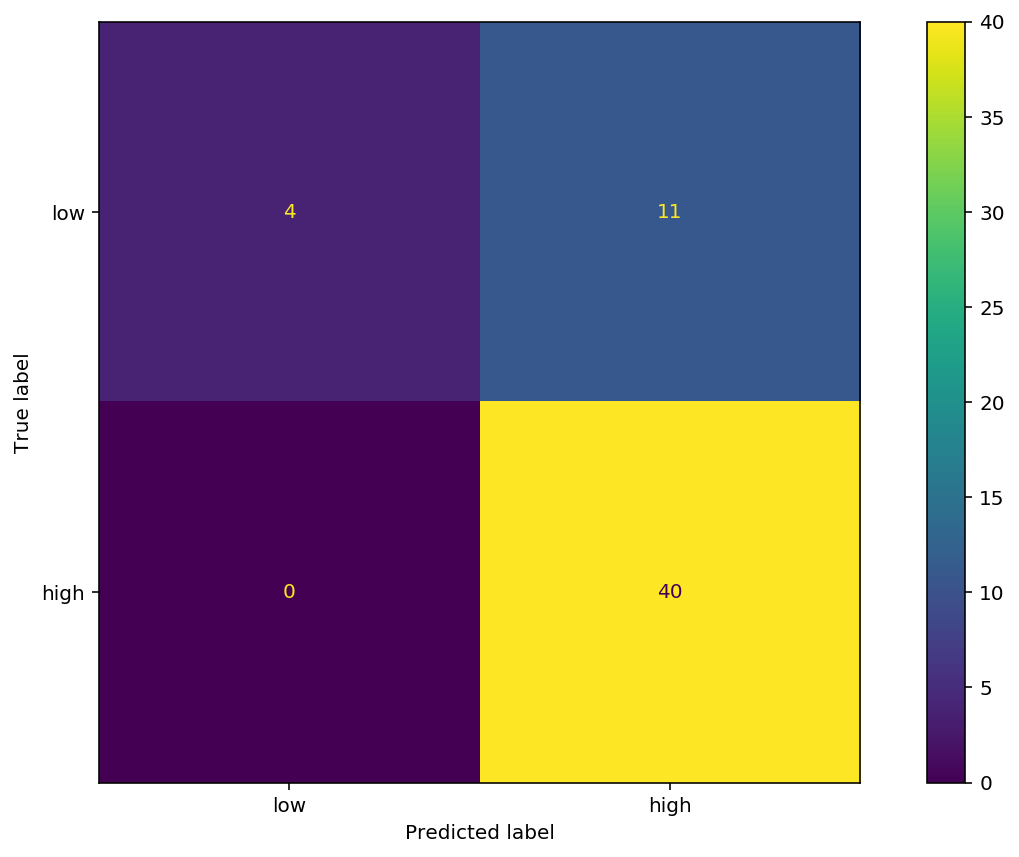

In [57]:
confusion_matrix = metrics.confusion_matrix(y_test, y_hat)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["low", "high"])

cm_display.plot()

fig = plt.gcf()

plt.show()

In [58]:
fig.savefig("SVM.png")yes

In [58]:
11 / 55

0.2

Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
X = my_data[["age", "timerecurrence"]].to_numpy()

In [63]:
y = my_data["survival_type"]

In [64]:
idx = np.arange(len(X))
np.random.shuffle(idx)

split_threshold = int(len(X) * 0.8)

In [65]:
x_train = X[:split_threshold]
x_test = X[split_threshold:]

y_train = y[:split_threshold]
y_test = y[split_threshold:]

In [66]:
y_train

0      high
1      high
2       low
3       low
4       low
       ... 
212    high
213     low
214     low
215     low
216    high
Name: survival_type, Length: 217, dtype: object

In [67]:
clf = RandomForestClassifier(max_depth = 3, random_state = 0, n_estimators = 20)

In [68]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=0)

In [69]:
y_hat = clf.predict(x_test)

In [70]:
from sklearn.tree import export_graphviz
# Export as dot file

estimator = clf.estimators_[15]

In [72]:
export_graphviz(estimator, out_file='tree.dot',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

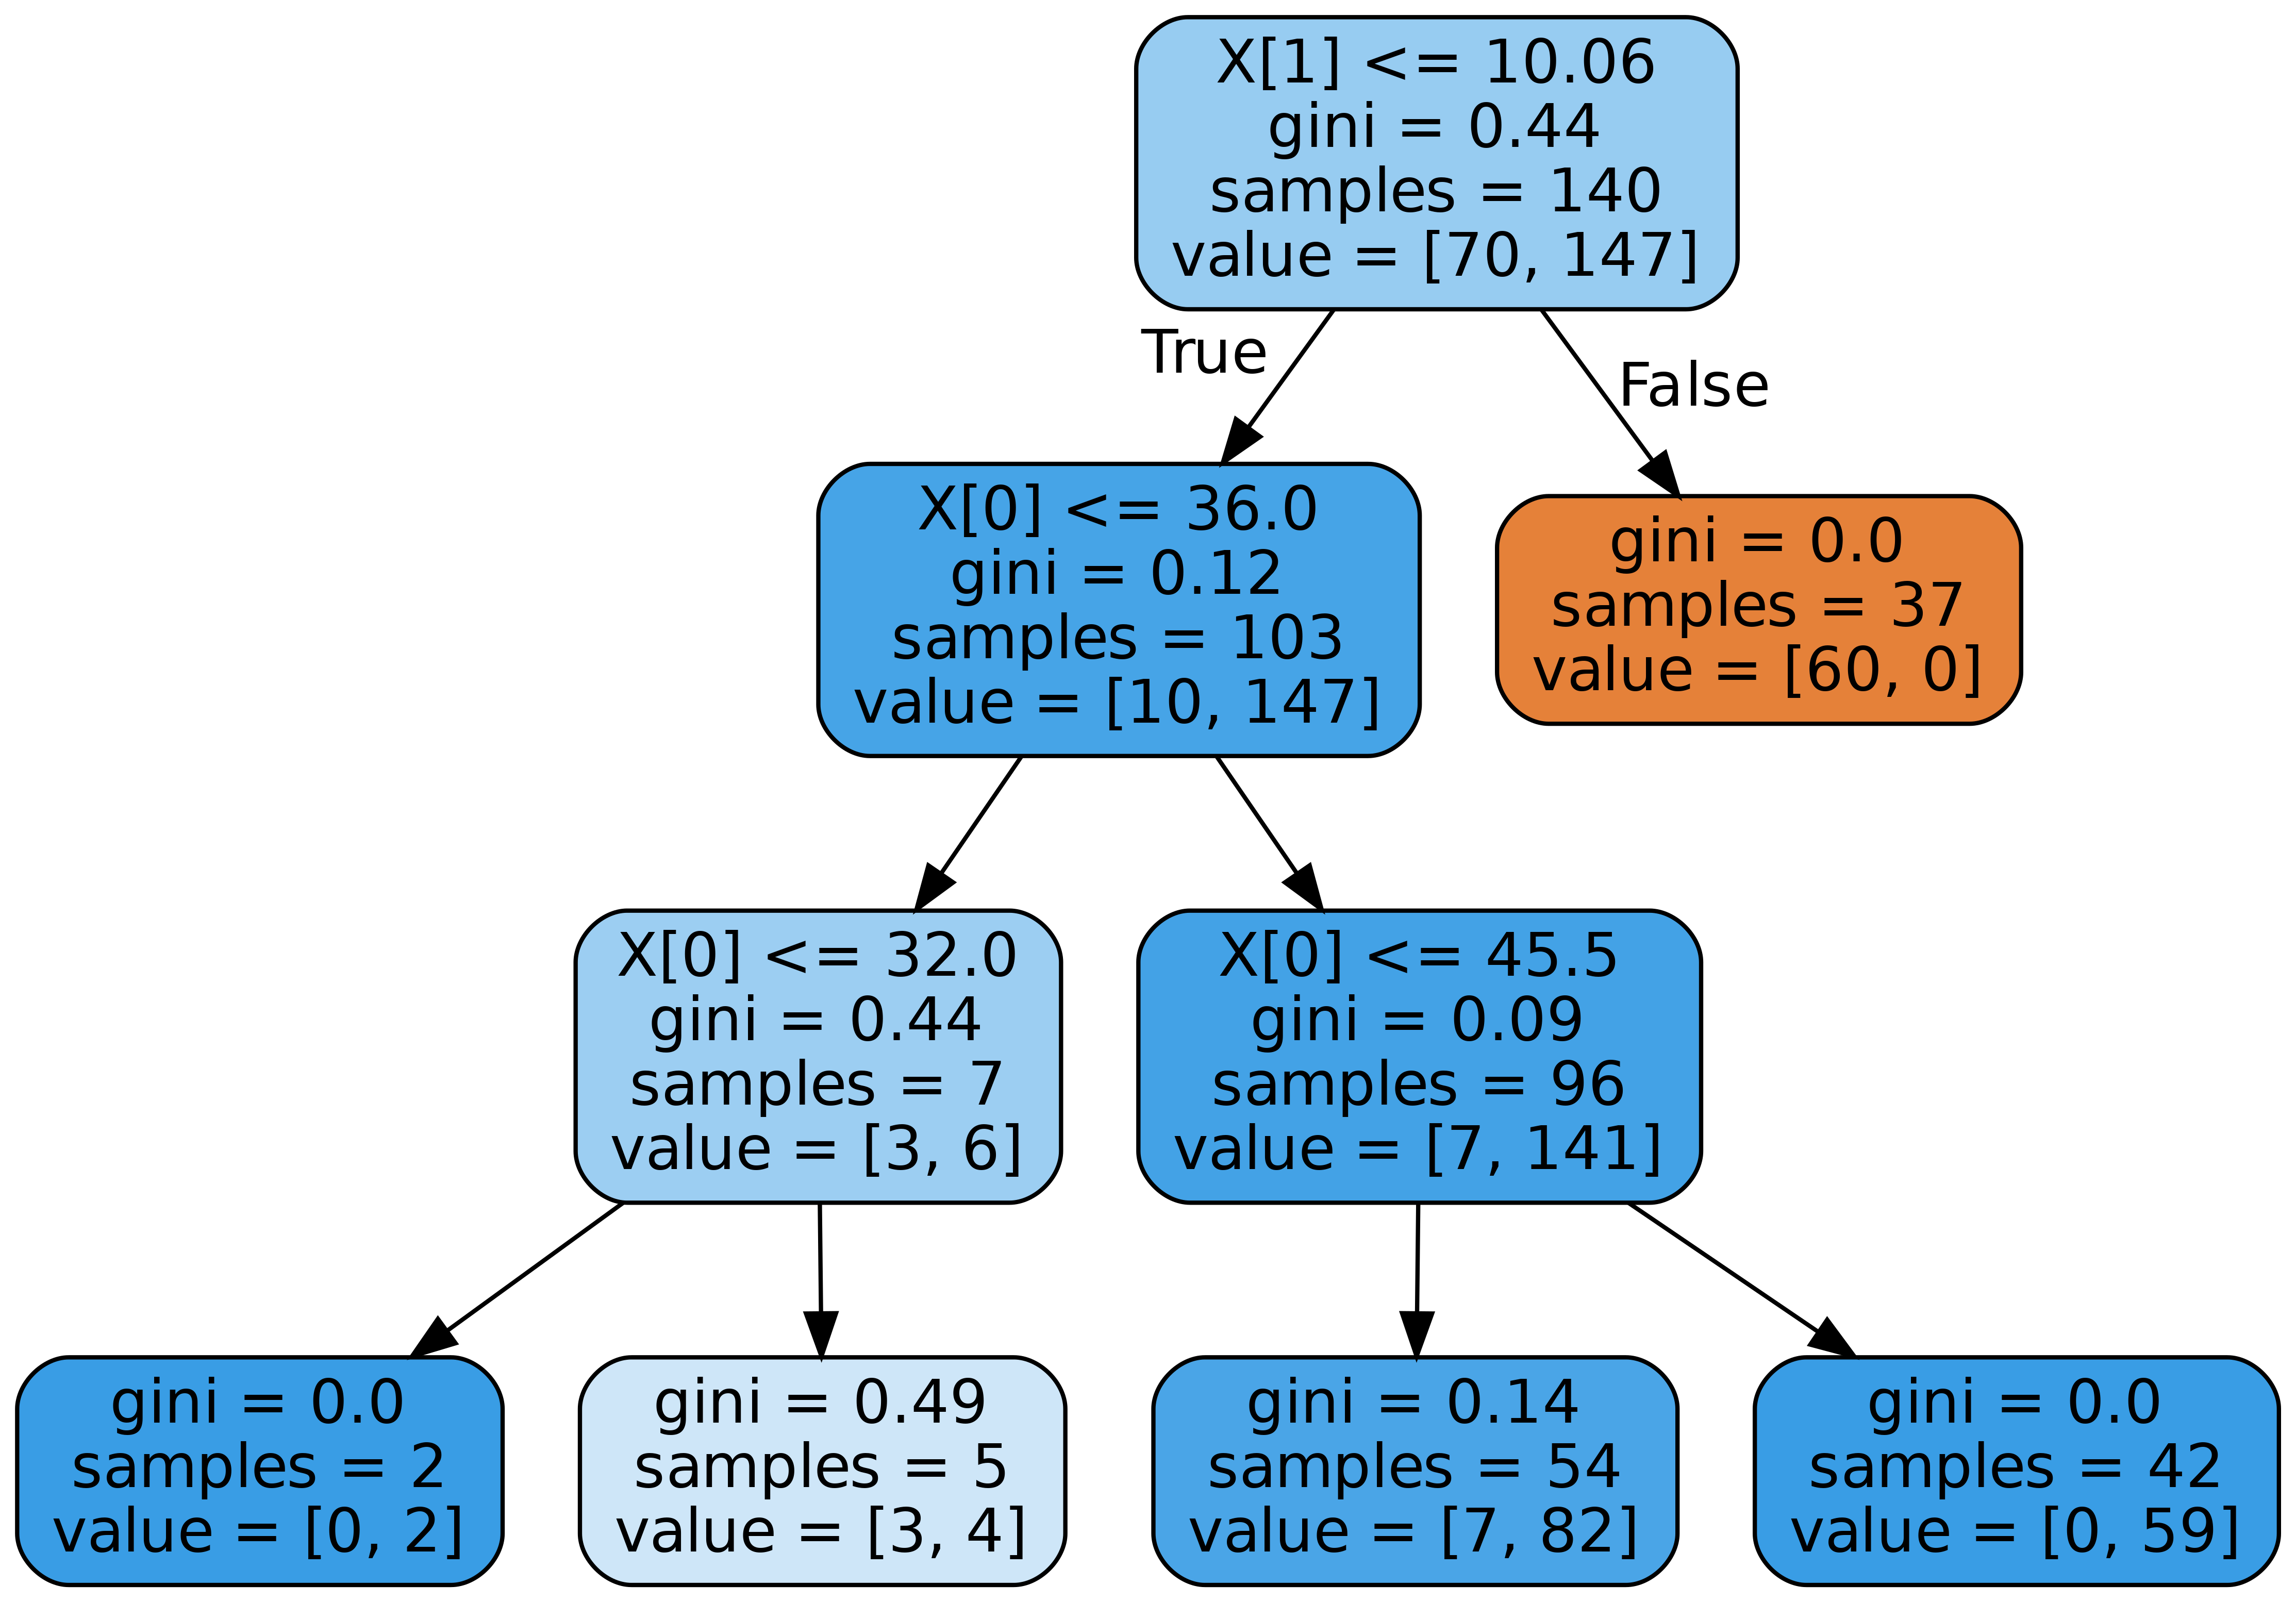

In [73]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [74]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyploy as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

TypeError: __init__() takes 1 positional argument but 2 were given